In [1]:
import os
cwd = os.getcwd()
cwd

'/home/vin/vin/new/cassandra-strict-slo/data_analysis'

In [2]:
RESULTS_DIR = "../results"

In [3]:
import os
for file in os.listdir(RESULTS_DIR):
    if file.startswith("mixShortload_1000000ops") and file.endswith("Client1"):
        print(file)

mixShortload_1000000ops_0_Client1
mixShortload_1000000ops_10_Client1
mixShortload_1000000ops_1_Client1
mixShortload_1000000ops_20_Client1
mixShortload_1000000ops_30_Client1
mixShortload_1000000ops_40_Client1
mixShortload_1000000ops_5_Client1


In [4]:
mixload_files = list(map(lambda file: RESULTS_DIR + "/" + file,
                    filter(lambda file: 
                       file.startswith("mixShortload_1000000ops") and file.endswith("Client1"),
                       os.listdir(RESULTS_DIR)
                    )))
mixload_files

['../results/mixShortload_1000000ops_0_Client1',
 '../results/mixShortload_1000000ops_10_Client1',
 '../results/mixShortload_1000000ops_1_Client1',
 '../results/mixShortload_1000000ops_20_Client1',
 '../results/mixShortload_1000000ops_30_Client1',
 '../results/mixShortload_1000000ops_40_Client1',
 '../results/mixShortload_1000000ops_5_Client1']

In [5]:
def get_percentiles(filename):
    file = open(filename, "r")
    lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

    # Remove everything before "Starting test"
    def get_line_with_find(lines, regex):
        for index, line in enumerate(lines):
            if line.find(regex) != -1:
                return index
        return -1

    test_index = get_line_with_find(lines, 'Starting test.')

    full_test = lines[test_index + 1:]
    
    read_test_lines = list(
        filter(lambda line: line.find("[READ]") != -1, 
        filter(lambda line: line.find("Percentile") != -1, full_test)
    ))

    def get_tuple_from_line(line):
        parts = line.split(",")
        
        percentile_string = parts[1].strip()
        percentile = percentile_string.split("Percentile")[0].replace("th", "")
        percentile = float(percentile)
        
        latency_string = parts[2].strip()
        latency = int(latency_string)
        
        return percentile, latency
    
    return list(map(get_tuple_from_line, read_test_lines))
    
#     print(get_tuple_from_line(read_test_lines[0]))
#     for line in read_test_lines:
#         print(line)
    
    
get_percentiles(mixload_files[0])

[(10.0, 1208),
 (20.0, 1448),
 (30.0, 1711),
 (40.0, 2016),
 (50.0, 2365),
 (60.0, 2787),
 (70.0, 3369),
 (80.0, 4343),
 (90.0, 6491),
 (95.0, 8503),
 (96.0, 9127),
 (97.0, 9991),
 (98.0, 11335),
 (99.0, 13967),
 (99.1, 14455),
 (99.2, 14991),
 (99.3, 15607),
 (99.4, 16327),
 (99.5, 17311),
 (99.6, 18687),
 (99.7, 20735),
 (99.8, 24255),
 (99.85, 27503),
 (99.89, 31487),
 (99.9, 32623)]

In [6]:
def get_cdf_for_file(filename):
    threshold = filename.split("1000000ops_")[1].split("_")[0]
    return threshold, get_percentiles(filename)
    
get_cdf_for_file(mixload_files[0])

('0',
 [(10.0, 1208),
  (20.0, 1448),
  (30.0, 1711),
  (40.0, 2016),
  (50.0, 2365),
  (60.0, 2787),
  (70.0, 3369),
  (80.0, 4343),
  (90.0, 6491),
  (95.0, 8503),
  (96.0, 9127),
  (97.0, 9991),
  (98.0, 11335),
  (99.0, 13967),
  (99.1, 14455),
  (99.2, 14991),
  (99.3, 15607),
  (99.4, 16327),
  (99.5, 17311),
  (99.6, 18687),
  (99.7, 20735),
  (99.8, 24255),
  (99.85, 27503),
  (99.89, 31487),
  (99.9, 32623)])

In [7]:
cdfs = list(map(get_cdf_for_file, mixload_files))
cdfs

[('0',
  [(10.0, 1208),
   (20.0, 1448),
   (30.0, 1711),
   (40.0, 2016),
   (50.0, 2365),
   (60.0, 2787),
   (70.0, 3369),
   (80.0, 4343),
   (90.0, 6491),
   (95.0, 8503),
   (96.0, 9127),
   (97.0, 9991),
   (98.0, 11335),
   (99.0, 13967),
   (99.1, 14455),
   (99.2, 14991),
   (99.3, 15607),
   (99.4, 16327),
   (99.5, 17311),
   (99.6, 18687),
   (99.7, 20735),
   (99.8, 24255),
   (99.85, 27503),
   (99.89, 31487),
   (99.9, 32623)]),
 ('10',
  [(10.0, 1192),
   (20.0, 1384),
   (30.0, 1571),
   (40.0, 1783),
   (50.0, 2040),
   (60.0, 2373),
   (70.0, 2861),
   (80.0, 3771),
   (90.0, 6143),
   (95.0, 8335),
   (96.0, 8983),
   (97.0, 9871),
   (98.0, 11239),
   (99.0, 14031),
   (99.1, 14487),
   (99.2, 15023),
   (99.3, 15591),
   (99.4, 16319),
   (99.5, 17311),
   (99.6, 18527),
   (99.7, 20287),
   (99.8, 23183),
   (99.85, 25487),
   (99.89, 28415),
   (99.9, 29215)]),
 ('1',
  [(10.0, 1195),
   (20.0, 1385),
   (30.0, 1562),
   (40.0, 1755),
   (50.0, 1984),
   (60.0,

In [8]:
from matplotlib import pyplot as plt

In [9]:
%matplotlib notebook

In [10]:
def get_cdfs_y(i):
    y = []
    lol = cdfs[i]
    for x in lol[1]:
        y.append(x[1])
    return y
i = 0
lol = cdfs[0]
x_axis = []
for x in lol[1]:
    x_axis.append(x[0])
print(x_axis)
y_0 = []
y_0 = get_cdfs_y(0)
print(y_0)
y_10 = get_cdfs_y(1)
print(y_10)
y_1 = get_cdfs_y(2)
print(y_1)
y_20 = get_cdfs_y(3)
print(y_20) 
y_30 = get_cdfs_y(4)
print(y_30)
y_40 = get_cdfs_y(5)
print(y_40)
y_5 = get_cdfs_y(6)
print(y_5)

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.85, 99.89, 99.9]
[1208, 1448, 1711, 2016, 2365, 2787, 3369, 4343, 6491, 8503, 9127, 9991, 11335, 13967, 14455, 14991, 15607, 16327, 17311, 18687, 20735, 24255, 27503, 31487, 32623]
[1192, 1384, 1571, 1783, 2040, 2373, 2861, 3771, 6143, 8335, 8983, 9871, 11239, 14031, 14487, 15023, 15591, 16319, 17311, 18527, 20287, 23183, 25487, 28415, 29215]
[1195, 1385, 1562, 1755, 1984, 2269, 2665, 3349, 5327, 7839, 8479, 9311, 10543, 12775, 13191, 13671, 14231, 14903, 15647, 16639, 18063, 20207, 21679, 23551, 24095]
[1190, 1386, 1578, 1799, 2069, 2419, 2941, 3919, 6423, 8759, 9503, 10487, 12055, 15055, 15575, 16127, 16767, 17599, 18607, 19935, 21775, 24799, 27279, 30351, 31423]
[1204, 1398, 1586, 1800, 2067, 2425, 2981, 3999, 6431, 8847, 9591, 10599, 12127, 15191, 15719, 16287, 16927, 17791, 18879, 20239, 22287, 26031, 29071, 32335, 33663]
[1201, 1406, 1611, 1850, 

<IPython.core.display.Javascript object>


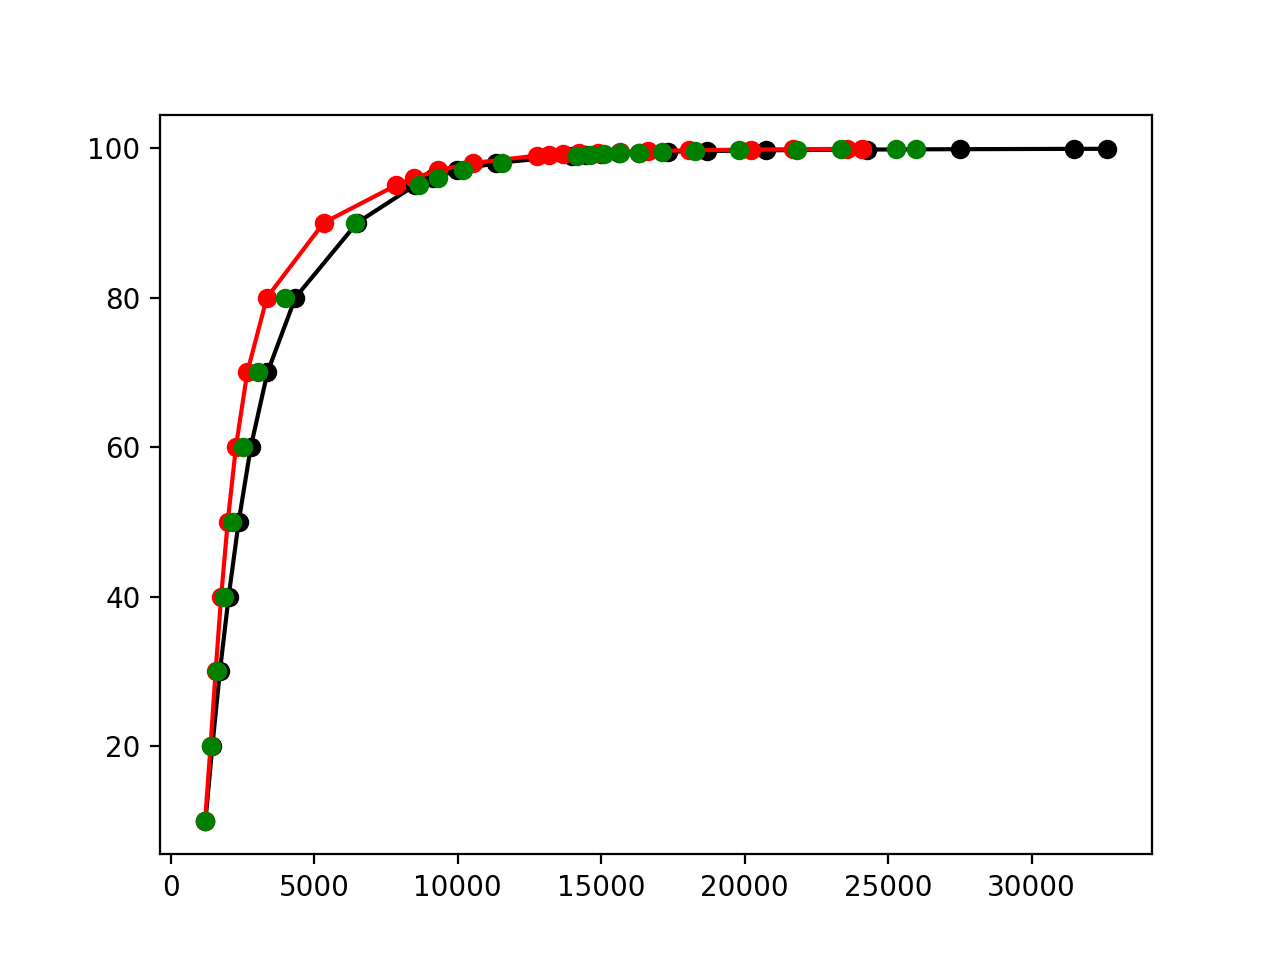

In [11]:
plt.plot(y_0, x_axis,'-ok', color="black")
# plt.plot(y_1,x_axis,'-or', color="red")
plt.plot(y_1,x_axis,'-og', color="red")
# plt.plot(y_10,x_axis,'-oc')
# plt.plot(y_20,x_axis,'-oy', color="green")
#plt.plot(y_30,x_axis,'k')
plt.plot(y_40,x_axis,'or', color="green")



plt.show()

In [12]:
import re
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

def get_timestamps(filename):
    file = open(filename, "r")
    lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

    # Remove everything before "Starting test"
    def get_line_with_find(lines, regex):
        for index, line in enumerate(lines):
            if line.find(regex) != -1:
                return index
        return -1


    body_index = get_line_with_find(lines, 'Starting test.')

    body = lines[body_index + 1:]
    
    # Get only data lines
    regex_pattern = re.compile(
        "^[0-9]{4}-(0[1-9]|1[0-2])-(0[1-9]|[1-2][0-9]|3[0-1]) (2[0-3]|[01][0-9]):[0-5][0-9]:[0-5][0-9]:[0-9]{3}")
    data_lines = list(filter(regex_pattern.match, body))

    # Get first and last line
    first_line = data_lines[0]
    last_line = data_lines[-1]

    # Parse the timestamps
    start_time_string = first_line.split()[0] + ' ' + first_line.split()[1][:12]
    end_time_string = last_line.split()[0] + ' ' + last_line.split()[1][:12]
    
    return (start_time_string, end_time_string)
    
def get_cassandra_metrics(filename):
    metrics_file = "_".join(filename.split("_")[:-1]) + "_metrics"
    
    files = list(map(lambda file: metrics_file + "/" + file,
                    filter(lambda file: 
                       file.startswith("Client1"),# and file.endswith("Client1"),
                       os.listdir(metrics_file + "/")
                    )))

    
#     print(files)
    
    metrics_df_node1 = pd.read_csv(files[1], parse_dates=True, infer_datetime_format=True, skipinitialspace=True)
    metrics_df_node1 = metrics_df_node1.dropna(axis='columns', how='all')
    
    
    start_time_string, end_time_string = get_timestamps(filename)
    in_benchmark = (metrics_df_node1['Timestamp'] > start_time_string) & (metrics_df_node1['Timestamp'] < end_time_string)
    metrics_df_node1 = metrics_df_node1[in_benchmark]
    
    metrics_df_node1['ReadThroughput'] = metrics_df_node1['ReadCount'] - metrics_df_node1['ReadCount'].shift(1)
    metrics_df_node1['WriteThroughput'] = metrics_df_node1['WriteCount'] - metrics_df_node1['WriteCount'].shift(1)

    metrics_df_node1 = metrics_df_node1.fillna(0)
    
    metrics_df_node1['SRDelay'][0] = 0


    return metrics_df_node1
    
    
metrics_df_node1 = get_cassandra_metrics(mixload_files[0])

metrics_df_node1
# mixload_files

/home/vin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Timestamp,MemoryUsed,ReadLatency1,ReadCount,WriteLatency1,WriteCount,PendingTasks,WaitingOnCommit1,SRDelay,ReadThroughput,WriteThroughput
0,2019-12-06 16:25:56.109,214032168,926.725598,225996,49.039635,12462,0,0.0,0,0.0,0.0
1,2019-12-06 16:25:57.232,227705904,926.725598,226896,49.039635,12515,0,0.0,125973,900.0,53.0
2,2019-12-06 16:25:58.298,240180792,926.725598,227784,49.039635,12557,0,0.0,62981,888.0,42.0
3,2019-12-06 16:25:59.333,255794880,926.725598,228730,49.039635,12611,0,0.0,31445,946.0,54.0
4,2019-12-06 16:26:00.399,272819456,926.725598,229863,49.039635,12667,0,0.0,15663,1133.0,56.0
5,2019-12-06 16:26:01.427,289777536,924.268915,231023,48.844572,12712,0,0.0,7709,1160.0,45.0
6,2019-12-06 16:26:02.462,305077656,924.268915,232183,48.844572,12763,0,0.0,3797,1160.0,51.0
7,2019-12-06 16:26:03.489,320662368,924.268915,233302,48.844572,12821,0,0.0,1908,1119.0,58.0
8,2019-12-06 16:26:04.522,338763592,924.268915,234499,48.844572,12872,0,0.0,969,1197.0,51.0
9,2019-12-06 16:26:05.556,353922320,924.268915,235605,48.844572,12929,0,0.0,509,1106.0,57.0


0
49


<IPython.core.display.Javascript object>


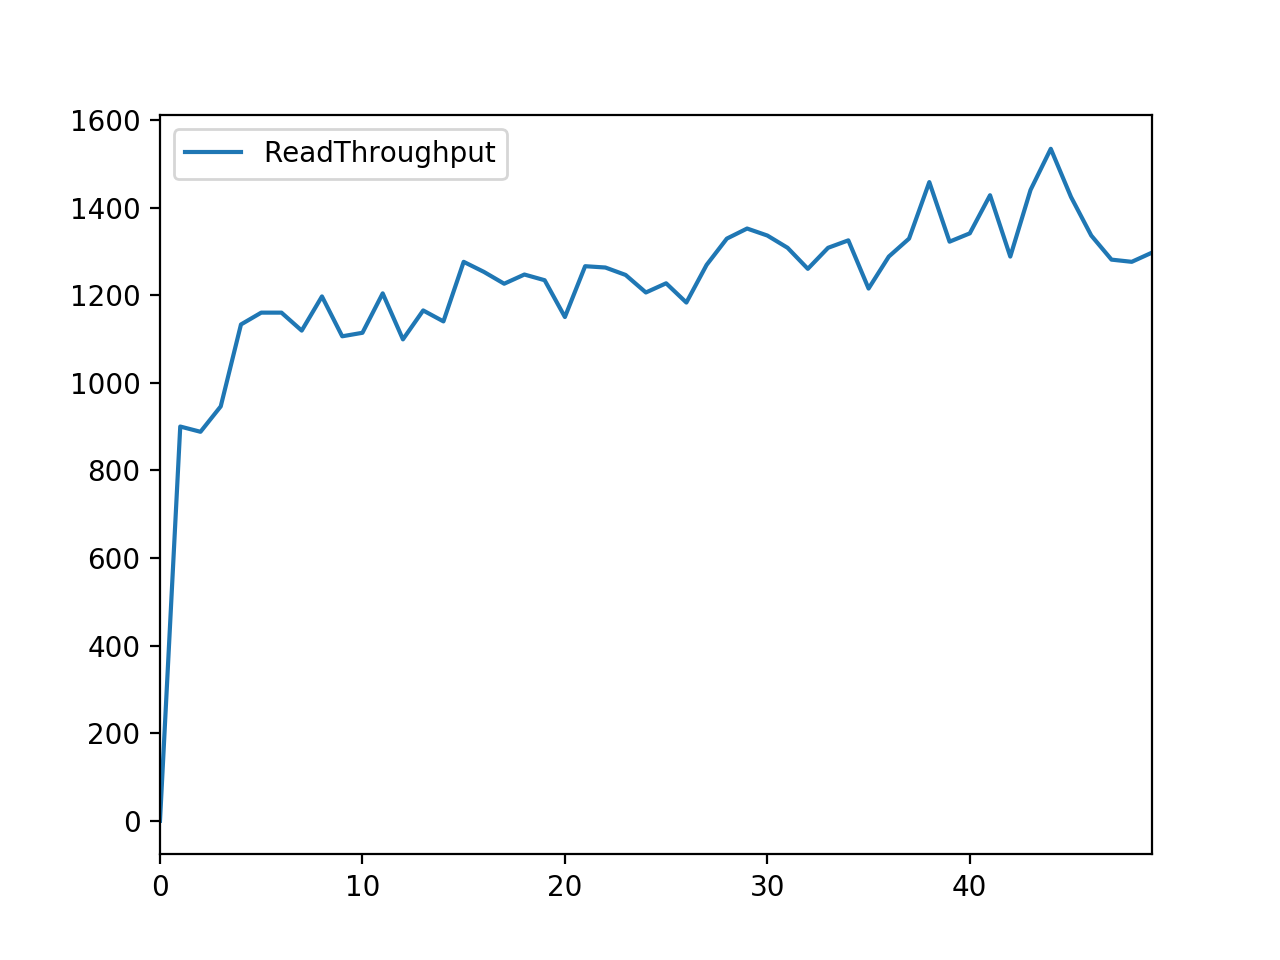

<IPython.core.display.Javascript object>


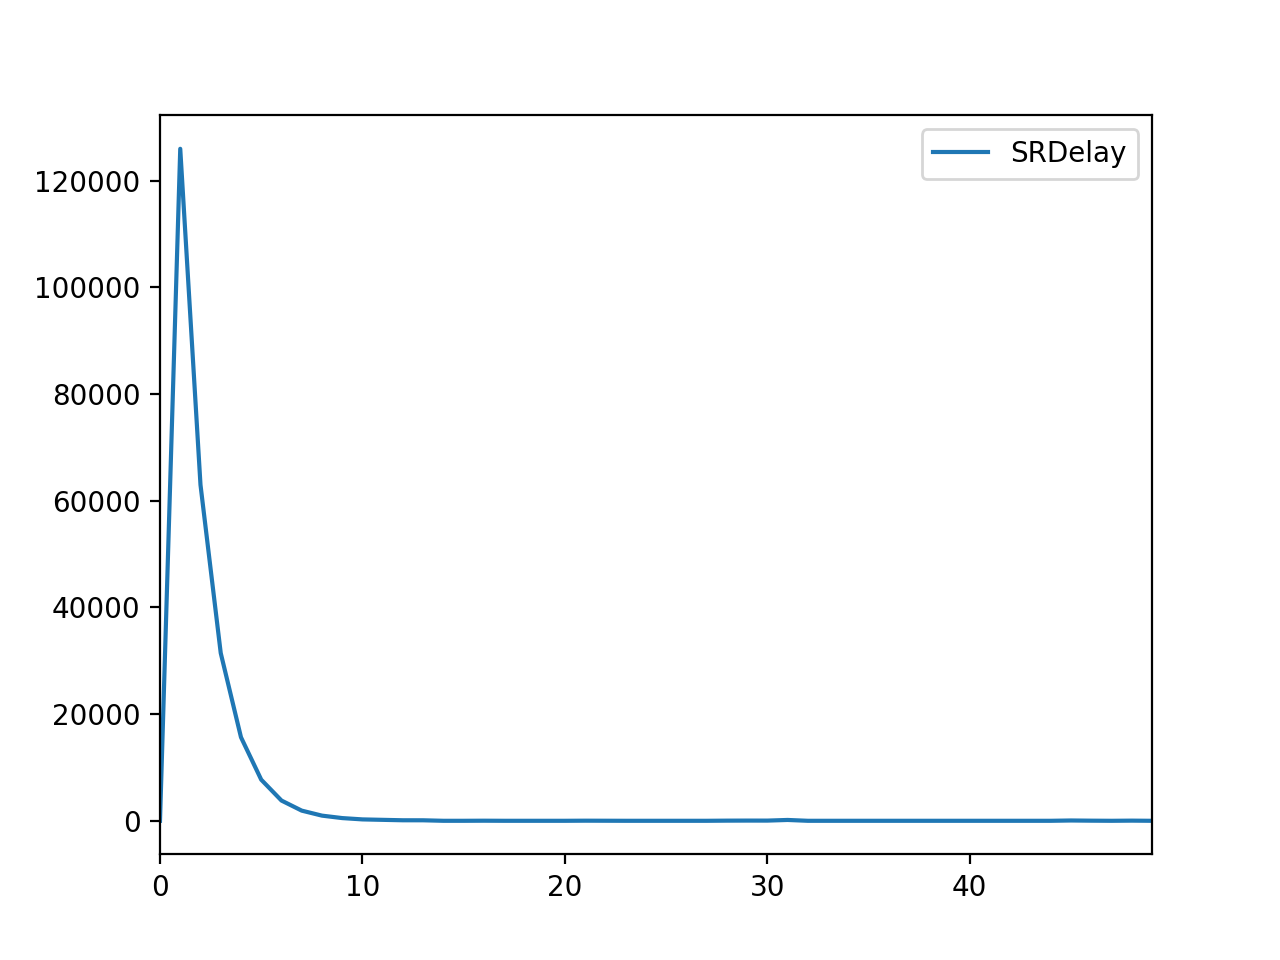

In [13]:
xmin = metrics_df_node1.index[0]
xmax = metrics_df_node1.index[-1]

print(xmin)
print(xmax)

ax = plt.gca()
metrics_df_node1.plot(kind='line', y='ReadThroughput')
metrics_df_node1.plot(kind='line', y='SRDelay')
plt.show()